In [ ]:
Dataset - #Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz as gp
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,ConfusionMatrixDisplay


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Guvi_collab/Social_Network_Ads.csv')

**Feature Scaling**



In [ ]:
#Encode the variable Gender in order to fit that into data
lc=LabelEncoder()
df['Gender']=lc.fit_transform(df[['Gender']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#will scale the salary column using standard scaler, according to the range equivalent to AGE .
MMS=MinMaxScaler(feature_range=(1,100))
df['EstimatedSalary']=MMS.fit_transform(df[['EstimatedSalary']])

**Splitting the dataset into the Training set and Test set**

In [ ]:
x=df.drop(['User ID','Purchased'],axis=1) #since the requirement here is to build a model with independant variables as salary, AGE and GENDER
y=df['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30) 

**Fitting Decision Tree Classification to the Training set**

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=2,max_leaf_nodes=10)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

**Predicting the Test set results**

In [ ]:
predicted_ytest=dtc.predict(x_test)
predicted_ytrain=dtc.predict(x_train) # predicting for training dataset too. To compare the fit between the test and training


**Making the Confusion Matrix**

In [ ]:
#confusion matrix for test dataset
CM=confusion_matrix(y_test,predicted_ytest)
print(CM)

[[72  7]
 [ 3 38]]


confusion matrix results for test 
*   TRUE POS =  72
*   FALSE POS = 3
*   FALSE NEG = 7
*   TRUE NEG  = 38



In [ ]:
#confusion matrix for training dataset
CM_train=confusion_matrix(y_train,predicted_ytrain)
print(CM_train)

[[165  13]
 [  9  93]]


confusion matrix results for train 
*   TRUE POS =  165
*   FALSE POS = 9
*   FALSE NEG = 13
*   TRUE NEG  = 93



In [ ]:
print(classification_report(y_test,predicted_ytest))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.84      0.93      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
print(classification_report(y_train,predicted_ytrain))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       178
           1       0.88      0.91      0.89       102

    accuracy                           0.92       280
   macro avg       0.91      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



**Visualising the Training set results**

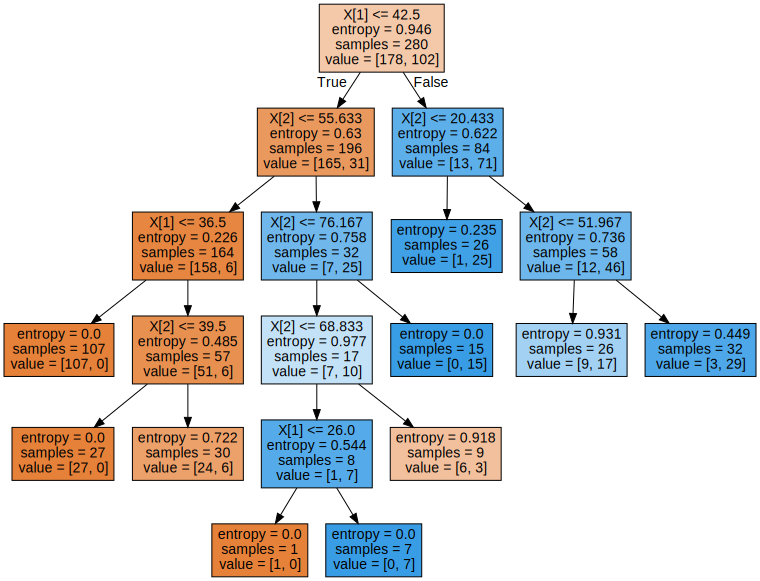

In [ ]:
data=tree.export_graphviz(dtc,filled=True)
graph = gp.Source(data, format="png") 
graph
#graph.render("decision_tree_graphivz")
#'decision_tree_graphivz.png'

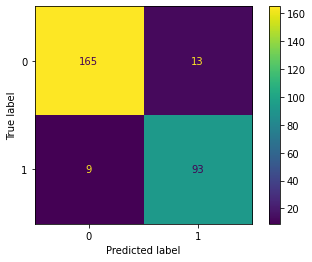

In [ ]:
ConfusionMatrixDisplay(CM_train).plot()

**Visualising the Test set results**

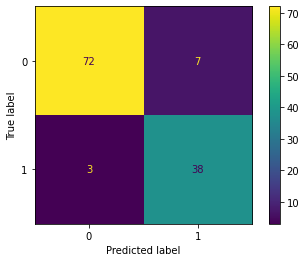

In [ ]:
ConfusionMatrixDisplay(CM).plot()